# Classification Exercises 
#### Corey Solitaire
#### 9/8/2020

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from math import sqrt
from scipy import stats

# Data Acquisition

# 1 In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
iris = sns.load_dataset('iris')

###   - print the first 3 rows
    

In [ ]:
print(iris.head(3))

###     - print the number of rows and columns (shape)
    

In [ ]:
print(iris.shape)

###    - print the column names
    

In [ ]:
print(iris.columns)

###    - print the data type of each column
    

In [ ]:
print(iris.dtypes)

In [ ]:
#more info is necessary
iris.info()

###     - print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [ ]:
print(iris.describe())

In [ ]:
print(iris.sepal_length.var(),
iris.sepal_width.var(),
iris.petal_length.var(),
iris.petal_width.var())

#### Petal length is much more variable then other measurments, I might reccomend scaling depending on the factors being examined

# 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [ ]:
customer = pd.read_excel('Spreadsheets_Exercises.xlsx')
customer.head()

###      -assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = customer.head(100)
df_excel_sample.info

###      -print the number of rows of your original dataframe

In [ ]:
print(customer.shape)

In [ ]:
#alternate option
customer.shape[0]

###      -print the first 5 column names

In [ ]:
print("Select First 5 columns:")
print(customer[['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']])

In [ ]:
# alternate method

customer.columns[:5]

###      -print the column names that have a data type of object

In [ ]:
filteredColumns = customer.dtypes[customer.dtypes == np.object]
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

###     -compute the range for each of the numeric variables.

In [ ]:
#Transcribes table
stats =customer._get_numeric_data().describe().T
stats

In [ ]:
stats['range'] = stats['max'] - stats['min']
stats[['mean', '50%', 'std', 'range']]

# 3. Read the data from this google sheet into a dataframe, df_google

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()

###    -print the first 3 rows

In [ ]:
print(df_googlesheet.head(3))

###    -print the number of rows and columns

In [ ]:
df_googlesheet.shape

###    -print the first five column names

In [ ]:
df_googlesheet.columns[:5]

In [ ]:
# alternate print to list for ease of access
df_googlesheet.columns.to_list()

###     -print the data type of each column

In [ ]:
df_googlesheet.dtypes

###     -print the summary statistics for each of the numeric variables

In [ ]:
df_googlesheet._get_numeric_data().describe()

###   -print the unique values for each of your categorical variables

In [ ]:
#df_googlesheet.select_dtypes(object)

df_ = df_googlesheet.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print(df_[col].unique()) # to print categories name only
    print(df_[col].value_counts())

In [ ]:
#alternate from faith
for col in df_googlesheet:
    if df_googlesheet[col].dtypes == 'object':
        print(f'{col} has {df_googlesheet[col].nunique()} unique values.')

# Make a new python module, acquire.py to hold the following data aquisition functions:

### 1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database. 

In [ ]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

df.head()

### 2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database. 

In [ ]:
def get_iris_data():
    return pd.read_sql('SELECT * FROM measurements AS m JOIN species AS s on m.species_id = s.species_id', get_connection('iris_db'))

df = get_iris_data()
df.head()

### 3. Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name. 

In [ ]:
#Titanic Dataset

# def get_titanic_data():
#     filename = "titanic.csv"

#     if os.path.isfile(filename):
#         return pd.read_csv(filename)
#     else:
#         # read the SQL query into a dataframe
#         df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

#         # Write that dataframe to disk for later. Called "caching" the data for later.
#         df.to_csv(filename, index = False)

#         # Return the dataframe to the calling code
#     return df

#import acquire
#acquire.get_titanic_data()


In [ ]:
#Iris Dataset

# def get_iris_data():
#     filename = "iris.csv"

#     if os.path.isfile(filename):
#        return pd.read_csv(filename)
#     else:
#         #read the SQL query into a dataframe
#         df = pd.read_sql('SELECT * FROM measurements AS m JOIN species AS s on m.species_id = s.species_id', get_connection('iris_db'))

#         #Write that dataframe to disk for later. Called "caching" the data for later.
#         df.to_csv(filename, index = False)

#         #Return the dataframe to the calling code
#     return df

#import acquire
#acquire.get_iris_data()

# Data Preparation

#### - Prepare Enviroment

In [ ]:
import pandas as pd
import numpy as np
import acquire

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler



- Iris Data

    - Use the function defined in acquire.py to load the iris data.
    - Drop the species_id and measurement_id columns.
    - Rename the species_name column to just species.
    - Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder. How might this be useful?
    - Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.


In [ ]:
 
'''
This function reads in iris data from Codeup database if cached == False
or if cached == True reads in iris df from a csv file, returns df
'''
# I ran this code first, to import data and save it as a dataframe
#iris = get_iris_data(cached=True)

iris = get_iris_data(cached=True)
iris.head()

In [ ]:
# Drop the species_id and measurement_id columns.

cols_to_drop = ['species_id']
iris = iris.drop(columns=cols_to_drop)
iris.head()

In [ ]:
# Rename the species_name column to just species.

iris.rename(columns = {'species_name':'species'}, inplace = True)
iris.head()

In [ ]:
# Train/Validate/Test Split

train_validate, test = train_test_split(iris, test_size=.2, 
                                        random_state=123, 
                                        stratify=iris.species)

train_validate.shape, test.shape


In [ ]:
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.species)
train.shape, validate.shape


In [ ]:
iris = get_iris_data(cached=True)
iris.head()

In [ ]:
# We do not need to use sklearn, we can just make dummy variables

df_dummies = pd.get_dummies(iris[['species_name']], drop_first=[True, True])
iris = pd.concat([iris, df_dummies], axis=1)
iris.head

In [ ]:
# Encode the species name using a sklearn label encoder. 
# Research the inverse_transform method of the label encoder. How might this be useful?

def label_encode(train, test):
    le = LabelEncoder()
    train['species'] = le.fit_transform(train.species)
    test['species'] = le.transform(test.species)
    return le, train, test

In [ ]:
label_encode(train, test)

In [ ]:
# Research the inverse_transform method of the label encoder. How might this be useful?

'''
Used to transform the data back in to categories after modeling for analysis
'''


In [ ]:
#Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

def prep_iris(df):
    le = LabelEncoder()
    df = df.drop(columns='species_id')
    df = df.rename(columns={'species_name': 'species'})
    train, test = train_test_split(df, train_size=.75, stratify=df.species, random_state=123)
    train, test, le = label_encode(train, test)
    return le, train, test


In [ ]:
prep_iris(iris)

# Titanic Data

####     Use the function you defined in acquire.py to load the titanic data set.

In [ ]:
'''
This function reads in titanic data from Codeup database if cached == False
or if cached == True reads in iris df from a csv file, returns df
'''
# I ran this code first, to import data and save it as a dataframe
#iris = get_iris_data(cached=True)

titanic = get_titanic_data(cached=True)
titanic.head()

####     Handle the missing values in the embark_town and embarked columns.

In [ ]:
# Dropped these colums because they are repeats, or do not provide extra insight in to who survived
cols_to_drop = ['embarked', 'class', 'passenger_id']
titanic = titanic.drop(columns=cols_to_drop)
titanic.head()

In [ ]:
# drop missing observations of embark town
titanic = titanic[~titanic.embark_town.isnull()]

####     Remove the deck column.

In [ ]:
cols_to_drop = ['deck']
titanic = titanic.drop(columns=cols_to_drop)
titanic.head()

####    Use a label encoder to transform the embarked column.

In [ ]:
#first we have to train/validate/test split data

train_validate, test = train_test_split(titanic, test_size=.2, 
                                        random_state=123, 
                                        stratify=titanic.survived)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.survived)

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
def label_encode(train, test):
    le = LabelEncoder()
    train['embark_town'] = le.fit_transform(train.embark_town)
    test['embark_town'] = le.transform(test.embark_town)
    return le, train, test

In [ ]:
label_encode(train, test)

####     Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?

In [ ]:
def scale_columns(train, test):
    scaler = MinMaxScaler()
    train[['age','fare']] = scaler.fit_transform(train[['age','fare']])
    test[['age','fare']] = scaler.transform(test[['age','fare']])
    return scaler, train, test

In [ ]:
scale_columns(train, test)

####     Fill the missing values in age. The way you fill these values is up to you. Consider the tradeoffs of different methods.

In [ ]:
def impute_age(train, test):
    avg_age = train.age.mean()
    train.age = train.age.fillna(avg_age)
    test.age = test.age.fillna(avg_age)
    return train, test

In [ ]:
impute_age(train, test)

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

####     Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the   transformations above applied.

In [ ]:
titanic = get_titanic_data(cached=True)
titanic.head()

In [ ]:
#prep_titanic_2

def drop_edit_columns(df):
    titanic = titanic[~titanic.embark_town.isnull()]
    cols_to_drop = ['embarked', 'class', 'deck', 'passenger_id']
    titanic = titanic.drop(columns=cols_to_drop)
    titanic.head()
    return df

def test_split(df):
    train_validate, test = train_test_split(titanic, test_size=.2, 
                                        random_state=123, 
                                        stratify=titanic.survived)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.survived)
    return df

def label_encode(train, test):
    le = LabelEncoder()
    train['embark_town'] = le.fit_transform(train.embark_town)
    test['embark_town'] = le.transform(test.embark_town)
    return le, train, test

def scale_columns(train, test):
    scaler = MinMaxScaler()
    train[['age','fare']] = scaler.fit_transform(train[['age','fare']])
    test[['age','fare']] = scaler.transform(test[['age','fare']])
    return scaler, train, test

def impute_age(train, test):
    avg_age = train.age.mean()
    train.age = train.age.fillna(avg_age)
    test.age = test.age.fillna(avg_age)
    return train, test

def prep_titanic_2(df):

    # drop the deck column bc most values Null
    drop_edit_columns
    
    train, test = train_test_split(df, train_size=.75, stratify=df.survived, random_state=123)
    
    # impute embarked town to 0,1,2
    train, test = label_encode_town(train, test)
    
    # scale age and fare columns
    train, test = scale_columns(train, test)
    
    # impute NaNs in age in train and test with the mean age in train
    train, test = impute_age(train, test)
    
    return scaler, train, test

In [ ]:
def drop_columns(df):
    df.drop(columns=['deck'], inplace=True)
    return df

def impute_embark_town(train, test):
    train['embark_town'] = train['embark_town'].fillna('Southampton')
    test['embark_town'] = test['embark_town'].fillna('Southampton')
    return train, test

def impute_embarked(train, test):
    train['embarked'] = train['embarked'].fillna('S')
    test['embarked'] = test['embarked'].fillna('S')
    return train, test

def impute_age(train, test):
    avg_age = train.age.mean()
    train.age = train.age.fillna(avg_age)
    test.age = test.age.fillna(avg_age)
    return train, test

def scale_columns(train, test):
    scaler = MinMaxScaler()
    train[['age','fare']] = scaler.fit_transform(train[['age','fare']])
    test[['age','fare']] = scaler.transform(test[['age','fare']])
    return scaler, train, test

def ohe_columns(train, test):
    # create encoder
    ohe = OneHotEncoder(sparse=False, categories='auto')
    
    # fit scaler on train and transform train and test to dense matrices
    train_matrix = ohe.fit_transform(train[['embarked']])
    test_matrix = ohe.transform(test[['embarked']])
    
    # transform matrices to DataFrames
    train_ohe = pd.DataFrame(train_matrix, columns=ohe.categories_[0], index=train.index)
    test_ohe = pd.DataFrame(test_matrix, columns=ohe.categories_[0], index=test.index)
    
    # join encoded matrix with original train or test matrices
    train = train.join(train_ohe)
    test = test.join(test_ohe)
    
    return ohe, train, test

def prep_titanic(df):

    # drop the deck column bc most values Null
    drop_columns(df)
    
    train, test = train_test_split(df, train_size=.75, stratify=df.survived, random_state=123)
    
    # impute 2 NaNs in embark_town with most frequent value
    train, test = impute_embark_town(train, test)
    
    # impute 2 NaNs in embarked with most frequent value
    train, test = impute_embarked(train, test)
    
    # impute NaNs in age in train and test with the mean age in train
    train, test = impute_age(train, test)
    
    # use a minmax scaler on age and fare bc of differing measurement units
    scaler, train, test = scale_columns(train, test)
    
    # ohe embarked creating three new columns for C, Q, S representing embark towns
    ohe, train, test = ohe_columns(train, test)
    
    return scaler, ohe, train, test

# Exploratory Data Analysis

#### Continue in your classification_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.

In [1]:
import pandas as pd
import numpy as np
import acquire
import prepare
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

#### 1. Split data into train (70%) & test (30%) samples. 

In [2]:
df = acquire.get_iris_data(cached=True)
df = prepare.prep_iris(df)
train_df, test_df = train_test_split(df, test_size=.30, random_state=123, stratify=df[['species']])

In [ ]:
train_df.info(), test_df.info()

#### 2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization. 

In [3]:
# "Melt" the dataset to "long-form" representation
train_df.drop(columns = ['species_versicolor', 'species_virginica'], inplace = True)
train_df = train_df.melt(id_vars=['species'], value_name='measurment')

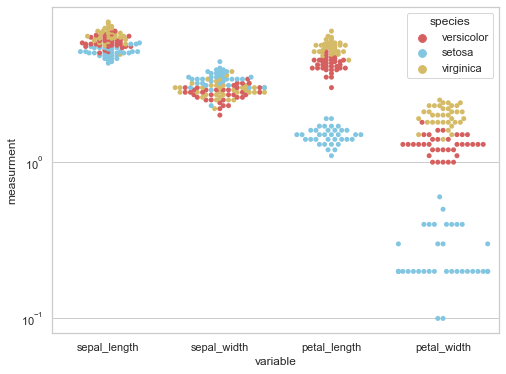

In [4]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="variable", y="measurment", hue="species",
              palette=["r", "c", "y"], data=train_df)
p.set(yscale="log")

plt.show()

#### 3. Create 4 subplots (2 rows x 2 columns) of scatterplots

In [6]:
# I had to formatt my origional df so I am just calling in a new one
df = acquire.get_iris_data(cached=True)
df = prepare.prep_iris(df)
train_df, test_df = train_test_split(df, test_size=.30, random_state=123, stratify=df[['species']])

In [7]:
train_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
60,versicolor,5.0,2.0,3.5,1.0,1,0
16,setosa,5.4,3.9,1.3,0.4,0,0
88,versicolor,5.6,3.0,4.1,1.3,1,0
130,virginica,7.4,2.8,6.1,1.9,0,1
6,setosa,4.6,3.4,1.4,0.3,0,0


In [ ]:
df.groupby()

   - sepal_length x sepal_width
   - petal_length x petal_width
   - sepal_area x petal_area
   - sepal_length x petal_length

In [ ]:
plt.figure(figsize = (14,8))

plt.subplot(2, 2, 1)
x = df_melt.sepal_lenght
y = df_melt.sepal_width
plt.plot(x,y)
plt.title ('Sepal Lenght vs. Sepal Width')


plt.subplot(2, 2, 2)
x = list(range(20))
y = [m.sqrt(n) for n in x]
plt.title ('$Y=\sqrt{2}$')
plt.plot(x,y)


plt.subplot(2, 2, 3)
x = list(range(20))
y = [n ** 3 for n in x]
plt.title ('$Y=X^3$')
plt.plot(x,y)


plt.subplot(2, 2, 4)
x = list(range(20))
y = [2 ** n for n in x]
plt.title ('$Y=2^X$')
plt.plot(x,y)


plt.suptitle("Four Function Graphic", fontsize = 20)
plt.tight_layout(pad = 3.0)
plt.show ()



   - Make your figure size 14 x 8. What are your takeaways?
   

#### 4. Create a heatmap of each variable layering correlation coefficient on top.

#### 5. Create a scatter matrix visualizing the interaction of each variable

#### 6. Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

   - MUST include null hypothesis, alternative hypothesis, t-test, results, summary
   - H0: the difference in sepal length between virginica and versicolor is insignificant.
   - Ha: the difference in sepal length between virginica and versicolor is substantial.
   - We will test if the sepal length of virginica is significantly different than that of the versicolor.
   - If there is difference, then variable sepal_length is a good choice to keep as a feature.
   - We can use a t-test here, as sepal_length is somewhat normally distributed.